In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

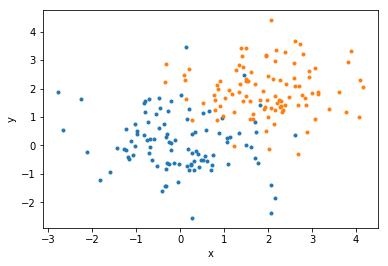

In [6]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [7]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [8]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

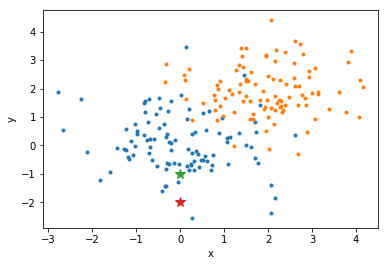

In [9]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [11]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [12]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]




# 5. iterate 3&4 till convergence

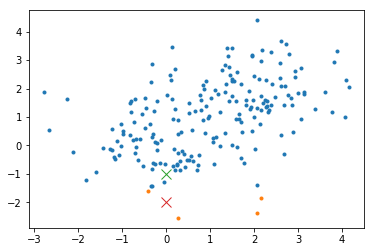

iteration 0


ValueError: too many values to unpack (expected 2)

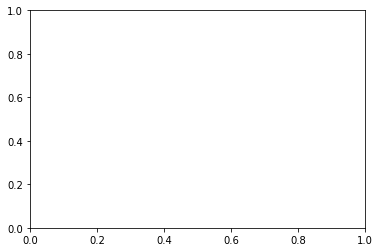

In [13]:
itera = 0
fig, ax = pl.subplots()

l1, = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
              np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], '.')
l2, = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
              np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], '.')
l3, = ax.plot(centers[0,0], centers[0,1],'x', markersize=10)
l4, = ax.plot(centers[1,0], centers[1,1],'x', markersize=10)

display(fig)

while (not (centers == newc).all()) or itera > 10:
    centers = newc
    print("iteration", itera)
    itera +=1
    pl.cla()
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], '.')
    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], '.')
    l3.set_data(centers[0,0], centers[0,1],'x')
    l4.set_data(centers[1,0], centers[1,1],'x')
     
    #animation
    time.sleep(1)
    clear_output(wait=True)
    display(fig)    

    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print("old center", centers)
    print("new centers", newc)

pl.show()
newc[0]

## ASH Score 75. Animation has errors